In [1]:
import sys
import random
sys.path.append("../")
from pprint import pprint
from Core.maze import Maze

# The Hunt and Kill algorithm
## How does it work?
The hunt and kill algorithm is very similar to the recursive backtracer algorithms. To generate mazes with this algorithm, we simulate random walks in the grid until we find a dead end. When a dead-end is found, we search the maze for an unvisited node from the top left to the bottom right, and when we find one this becomes our starting point for the random walk. If no unvisited node is found, the maze has been completed.
## Is every node connected?
Yes every node is connected as we do not stop the algorithm till we've visited every node. Therefore we can conclude that every node is connected to every other node.

In [2]:
def HuntKill(maze):
    # Creating a visited array to check if the node has been visited or not
    # O represents unvisited and 1 represents visited
    vis = []
    for i in range(0, maze.num_rows):
        vis.append(list(bytearray(maze.num_columns)))
    
    current = (random.randint(0, maze.num_rows-1), random.randint(0, maze.num_columns-1))
    
    while True:
        directions = []
        x, y = current
        vis[x][y] = 1
        
        if x > 0 and vis[x-1][y] == 0:
            directions.append('N')
        if y > 0 and vis[x][y-1] == 0:
            directions.append('W')
        if x < maze.num_rows-1 and vis[x+1][y] == 0:
            directions.append('S')
        if y < maze.num_columns-1 and vis[x][y+1] == 0:
            directions.append('E')
        
        if len(directions) == 0:
            flag = False
            for i in range(0, maze.num_rows):
                if flag == True:
                    break
                for j in range(0, maze.num_columns):
                    if vis[i][j] == 0:
                        if i > 0 and vis[i-1][j] == 1:
                            current = (i, j)
                            vis[i][j] = 1
                            maze.add_path((j, i), 'N', 0)
                            flag = True
                            break
                        if j > 0 and vis[i][j-1] == 1:
                            current = (i, j)
                            vis[i][j] = 1
                            maze.add_path((j, i), 'W', 0)
                            flag = True
                            break
                        if i < maze.num_rows-1 and vis[i+1][j] == 1:
                            current = (i, j)
                            vis[i][j] = 1
                            maze.add_path((j, i), 'S', 0)
                            flag = True
                            break
                        if j < maze.num_columns-1 and vis[i][j+1] == 1:
                            current = (i, j)
                            vis[i][j] = 1
                            maze.add_path((j, i), 'E', 0)
                            flag = True
                            break
            if flag == False:
                return

        else:
            choice = directions[random.randint(0, len(directions)-1)]
            maze.add_path((y, x), choice, 0)
            if choice == 'N':
                current = (x-1, y)
            elif choice == 'S':
                current = (x+1, y)
            elif choice == 'E':
                current = (x, y+1)
            elif choice == 'W':
                current = (x, y-1)

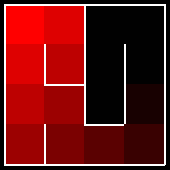

In [3]:
maze = Maze(4, 4)
HuntKill(maze)
maze.add_colors()
display(maze.draw(cell_width=40))
maze.dump("HuntKill_4x4.maze")

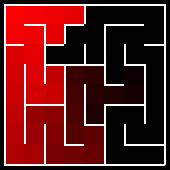

In [4]:
maze = Maze(8, 8)
HuntKill(maze)
maze.add_colors()
display(maze.draw(cell_width=20))
maze.dump("HuntKill_8x8.maze")

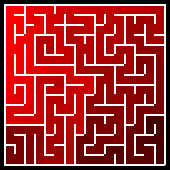

In [5]:
maze = Maze(16, 16)
HuntKill(maze)
maze.add_colors()
display(maze.draw(cell_width=10))
maze.dump("HuntKill_16x16.maze")

## Basic Analysis
### Time Complexity : O(N<sup>4</sup>)
We visit each node once, and in the worst case we'll have to search for an unvisited node at every step. However for this algorithm (like most other maze generating algorithms) there is the essence of randomness, and the actual time taken can vary drastically.
### Additional Space : O(N<sup>2</sup>)
For each node we need to keep a track of its visited status. This requires atleast a bit of memory per node, resulting in N<sup>2</sup> bits of memory (minimum).
### Bias :
There is no evident bias, however passages in the mazes generated tend to be long and winding as we simulate random walks. 

In [8]:
total = {"Deadends": 0, "Straightways": 0, "LeftTurns": 0, "RightTurns": 0, "Junctions": 0, "Crossroads": 0}
for i in range(0, 100):
    maze = Maze(100, 100)
    HuntKill(maze)
    partial = maze.benchmark()
    total["Deadends"] += partial["Deadends"]
    total["Straightways"] += partial["Straightways"]
    total["LeftTurns"] += partial["LeftTurns"]
    total["RightTurns"] += partial["RightTurns"]
    total["Junctions"] += partial["Junctions"]
    total["Crossroads"] += partial["Crossroads"]

div = 0
for i in total:
    div += total[i]

for i in total:
    total[i] /= div
    total[i] *= 100
    round(total[i], 3)

for i in total:
    print("%12s %s %3f" % (i, " : ", total[i]))

    Deadends  :  9.422100
Straightways  :  31.249400
   LeftTurns  :  25.270000
  RightTurns  :  24.656400
   Junctions  :  9.402100
  Crossroads  :  0.000000


### Further analysis
Here we can see that the percentage of dead ends and junctions is very low, and the percentage of straightways is relatively high. This again indicates that passages tend to be long and wind around each other as they are generally straight. There isn't any bias towards any of the directions for turns. This type of maze would be a good way to ensure very few deviations from a 'main' path but still have a little exploration. 